In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

C:\Users\Саня\AppData\Local\Temp\ipykernel_10632\3502007509.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Loading and basic information

In [2]:
train_data = pd.read_json('dataset/train.json', orient='records')
test_data = pd.read_json('dataset/test.json', orient='records')
train_data.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


In [3]:
template = 'Number of rows: {}, number of columns: {}'
print('Train data:', template.format(len(train_data.index), len(train_data.columns)))
print('Test data:', template.format(len(test_data.index), len(test_data.columns)))

Train data: Number of rows: 6807, number of columns: 5
Test data: Number of rows: 10, number of columns: 4


## Quantity analisys

In [4]:
class_labels = ['NAME_STUDENT', 'EMAIL', 'USERNAME', 'ID_NUM', 'PHONE_NUM', 'URL_PERSONAL', 'STREET_ADDRESS', 'Background']

In [5]:
def find_labels(labels: list):
    labels_count = [0] * len(class_labels)
    for token in labels:
        if token.startswith('B-') or token.startswith('I-'):
            class_name = token[2:]
            class_index = class_labels.index(class_name)
            labels_count[class_index] += 1
        elif token == 'O':
            labels_count[-1] += 1
    return labels_count

In [6]:
class_counts = train_data['labels'].map(find_labels)
class_counts = pd.DataFrame(np.array(class_counts.to_list()), columns=class_labels)
class_counts = class_counts.sum()
class_counts

NAME_STUDENT         2461
EMAIL                  39
USERNAME                6
ID_NUM                 79
PHONE_NUM              21
URL_PERSONAL          111
STREET_ADDRESS         22
Background        4989794
dtype: int64

### As we can see, we have a huge class disbalance (most tokens are non-labeled)

### Let's look at distribution of labeled tokens

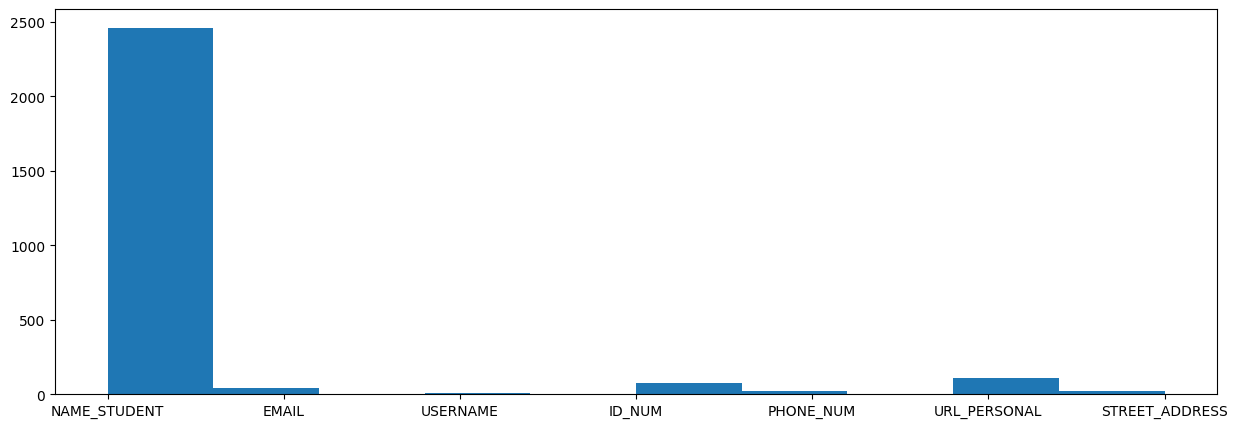

In [7]:
plt.figure(figsize=(15, 5))
plt.hist(class_labels[:-1], weights=class_counts[:-1])
None

### We also have huge disbalance in a labeled data too

### Let's look at lengths of texts

In [8]:
text_lens = train_data["tokens"].map(len)
text_lens.describe()

count    6807.000000
mean      733.441017
std       319.244697
min        69.000000
25%       520.000000
50%       693.000000
75%       897.000000
max      3298.000000
Name: tokens, dtype: float64

### We have a huge texts that can be hard to process for some base models